# Data_Cleaning Summary

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt


data = pd.read_csv("C:/data/dirtydata.csv")


In [6]:
#Cheking for duplicates 
duplicate = data[data.duplicated()]
  
print("Duplicate Rows :")

Duplicate Rows :


In [12]:
#remove duplcates 
data.drop_duplicates(inplace= True) #when we use in place we modify the data and we sont require to save a copy 

In [13]:
#check for nulls / percentage  of nulls 

data.isnull().any()
data.isnull().sum()/ data.shape[0]

Unnamed: 0      0.000000
id              0.000000
url             0.000000
region          0.000000
region_url      0.000000
price           0.000000
year            0.002292
manufacturer    0.039763
model           0.010576
condition       0.421071
cylinders       0.373494
fuel            0.007064
odometer        0.120693
title_status    0.005624
transmission    0.005329
VIN             0.409305
drive           0.292851
size            0.701307
type            0.246038
paint_color     0.307375
image_url       0.000061
description     0.000153
state           0.000000
lat             0.016254
long            0.016254
posting_date    0.000061
dtype: float64

In [14]:
#remove columns with certain threshold of nulls
#threshold is the number of columns or rows without nulls 
thresh = len(data)*.6
data.dropna(thresh = thresh, axis = 1)
data.dropna(thresh = 21, axis = 0)


,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458206,458206,7240967086,https://wausau.craigslist.org/cto/d/wittenberg...,wausau,https://wausau.craigslist.org,5300,2013.0,chevrolet,captiva,excellent,...,fwd,NaN,SUV,blue,https://images.craigslist.org/00g0g_71rrf48ZM3...,2013 Chevy Captiva - Brand new battery - Runs ...,wi,44.823200,-89.166500,2020-12-03T09:10:33-0600
458208,458208,7240959076,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,14995,2014.0,cadillac,srx,excellent,...,4wd,mid-size,SUV,silver,https://images.craigslist.org/00808_1bVcaYZtCy...,2014 Cadillac SRX All Wheel Drive Luxury Colle...,wi,44.408867,-89.881210,2020-12-03T08:56:29-0600
458209,458209,7240954682,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,17895,2018.0,hyundai,tucson,excellent,...,4wd,mid-size,SUV,white,https://images.craigslist.org/00l0l_gikkP11dEF...,2018 Hyundai Tucson SE 2.0 I4 AWD. Carfax ver...,wi,44.408867,-89.882240,2020-12-03T08:48:08-0600
458210,458210,7240645700,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,17900,2014.0,cadillac,cts coupe awd,excellent,...,4wd,mid-size,coupe,black,https://images.craigslist.org/00t0t_lNnW4cboOG...,"53,000 miles. Cosmetically, in near mint condi...",wy,44.784900,-106.964800,2020-12-02T14:09:45-0700


In [15]:
#imputing nulls fillna()----- using measures of central tendancy 
data.odometer.fillna(data.odometer.median())# Using median 
data.odometer.fillna(data.odometer.mean())# Using Mean 
data.odometer.fillna(data.odometer.mode()) # Using Mode 

0          32742.0
1          93600.0
2          87046.0
3         190000.0
4         116000.0
            ...   
458208     83790.0
458209     31888.0
458210     53000.0
458211    164000.0
458212    164000.0
Name: odometer, Length: 458213, dtype: float64

In [23]:
#use regex .extract
#use strip()
#use replace()
#split 

data.cylinders.dtype
data.cylinders.value_counts()
data.cylinders = data.cylinders.apply(lambda x: str(x).replace('cylinders','').strip())
data.cylinders.value_counts()


nan      171140
6        105677
4         94767
8         81179
5          2058
10         1543
other      1112
3           550
12          187
Name: cylinders, dtype: int64

In [24]:
#change data type 
data.cylinders = pd.to_numeric(data.cylinders, errors = 'coerce')


<AxesSubplot:>

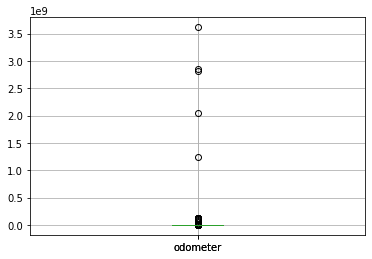

In [25]:
#boxplot 
data.boxplot('price')
data.boxplot('odometer')


In [26]:
#outlier detection and normalization remove rows with > 99% / z score 
numeric = data._get_numeric_data()


In [27]:
numeric

,Unnamed: 0,id,price,year,cylinders,odometer,lat,long
0,0,7240372487,35990,2010.0,8.0,32742.0,32.590000,-85.480000
1,1,7240309422,7500,2014.0,4.0,93600.0,32.547500,-85.468200
2,2,7240224296,4900,2006.0,6.0,87046.0,32.616807,-85.464149
3,3,7240103965,2000,1974.0,4.0,190000.0,32.861600,-85.216100
4,4,7239983776,19500,2005.0,8.0,116000.0,32.547500,-85.468200
...,...,...,...,...,...,...,...,...
458208,458208,7240959076,14995,2014.0,6.0,83790.0,44.408867,-89.881210
458209,458209,7240954682,17895,2018.0,4.0,31888.0,44.408867,-89.882240
458210,458210,7240645700,17900,2014.0,6.0,53000.0,44.784900,-106.964800
458211,458211,7240600465,1300,2008.0,8.0,164000.0,44.773500,-106.939600


<AxesSubplot:>

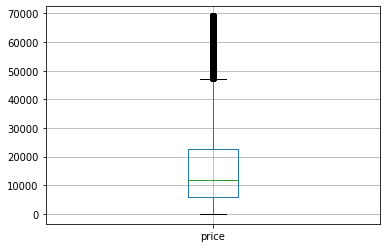

In [28]:
# with no null values 
from scipy import stats
import numpy as np 

data_outliers = data[(data.price < data.price.quantile(.995)) & (data.price > data.price.quantile(.005))]

data_outliers.boxplot('price')

In [29]:
#remove duplcates, subset, keep, etc.
data.drop_duplicates()


,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,458208,7240959076,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,14995,2014.0,cadillac,srx,excellent,...,4wd,mid-size,SUV,silver,https://images.craigslist.org/00808_1bVcaYZtCy...,2014 Cadillac SRX All Wheel Drive Luxury Colle...,wi,44.408867,-89.881210,2020-12-03T08:56:29-0600
458209,458209,7240954682,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,17895,2018.0,hyundai,tucson,excellent,...,4wd,mid-size,SUV,white,https://images.craigslist.org/00l0l_gikkP11dEF...,2018 Hyundai Tucson SE 2.0 I4 AWD. Carfax ver...,wi,44.408867,-89.882240,2020-12-03T08:48:08-0600
458210,458210,7240645700,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,17900,2014.0,cadillac,cts coupe awd,excellent,...,4wd,mid-size,coupe,black,https://images.craigslist.org/00t0t_lNnW4cboOG...,"53,000 miles. Cosmetically, in near mint condi...",wy,44.784900,-106.964800,2020-12-02T14:09:45-0700
458211,458211,7240600465,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,1300,2008.0,jeep,grand cherokee,good,...,4wd,mid-size,SUV,white,https://images.craigslist.org/00C0C_fl0NW1IeJw...,PRICE REDUCTION Turns out the engine is toast...,wy,44.773500,-106.939600,2020-12-02T13:01:04-0700


<AxesSubplot:>

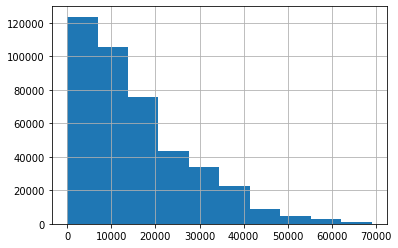

In [30]:
#histogram
data_outliers.price.hist()


In [31]:
#types of normalization 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data.cylinders.values.reshape(-1,1))
scaler.transform(data.cylinders.values.reshape(-1,1))

array([[0.55555556],
       [0.11111111],
       [0.33333333],
       ...,
       [0.33333333],
       [0.55555556],
       [       nan]])

# Finding Relationships
A great aspect of the Pandas module is the corr() method.

The corr() method calculates the relationship between each column in your data set.

In [116]:
df.corr()

,Duration,Pulse,Maxpulse,Calories,calpul,dupul,Durationprice2x
Duration,1.000000,-0.155408,0.009403,0.922717,0.946365,0.985333,1.000000
Pulse,-0.155408,1.000000,0.786535,0.025121,-0.120408,-0.275275,-0.155408
Maxpulse,0.009403,0.786535,1.000000,0.203813,0.078419,-0.099643,0.009403
Calories,0.922717,0.025121,0.203813,1.000000,0.980602,0.872975,0.922717
calpul,0.946365,-0.120408,0.078419,0.980602,1.000000,0.928288,0.946365
dupul,0.985333,-0.275275,-0.099643,0.872975,0.928288,1.000000,0.985333
Durationprice2x,1.000000,-0.155408,0.009403,0.922717,0.946365,0.985333,1.000000


# Result Explained
The Result of the corr() method is a table with a lot of numbers that represents how well the relationship is between two columns.

The number varies from -1 to 1.

1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.

0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.

-0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.

0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.

# Perfect Correlation:
We can see that "Duration" and "Duration" got the number 1.000000, which makes sense, each column always has a perfect relationship with itself.

Good Correlation:
"Duration" and "Calories" got a 0.922721 correlation, which is a very good correlation, and we can predict that the longer you work out, the more calories you burn, and the other way around: if you burned a lot of calories, you probably had a long work out.

Bad Correlation:
"Duration" and "Maxpulse" got a 0.009403 correlation, which is a very bad correlation, meaning that we can not predict the max pulse by just looking at the duration of the work out, and vice versa.

**** What is a good correlation?*** It depends on the use, but I think it is safe to say you have to have at least 0.6 (or -0.6) to call it a good correlation

# Plotting
Pandas uses the ***plot()*** method to create diagrams.

Pythons uses Pyplot, a submodule of the Matplotlib library to visualize the diagram on the screen.

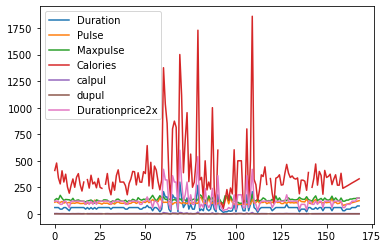

In [117]:
#ploting 
df.plot() #creates te plot 

plt.show() # showing th eplot on to the screan

# Scatter Plot
Specify that you want a scatter plot with the kind argument:

kind = 'scatter'

A scatter plot needs an x- and a y-axis.

In the example below we will use "Duration" for the x-axis and "Calories" for the y-axis.

Include the x and y arguments like this:

x = 'Duration', y = 'Calories'

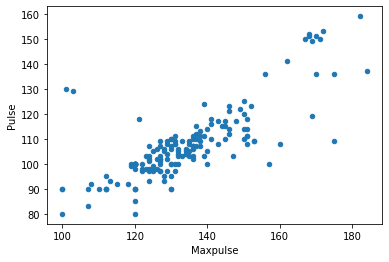

In [121]:
df.plot(kind = 'scatter', x = 'Maxpulse', y = 'Pulse')

plt.show() #displaying plots

AUTOMATION OF EDA 


In [120]:
df.corr()

,Duration,Pulse,Maxpulse,Calories,calpul,dupul,Durationprice2x
Duration,1.000000,-0.155408,0.009403,0.922717,0.946365,0.985333,1.000000
Pulse,-0.155408,1.000000,0.786535,0.025121,-0.120408,-0.275275,-0.155408
Maxpulse,0.009403,0.786535,1.000000,0.203813,0.078419,-0.099643,0.009403
Calories,0.922717,0.025121,0.203813,1.000000,0.980602,0.872975,0.922717
calpul,0.946365,-0.120408,0.078419,0.980602,1.000000,0.928288,0.946365
dupul,0.985333,-0.275275,-0.099643,0.872975,0.928288,1.000000,0.985333
Durationprice2x,1.000000,-0.155408,0.009403,0.922717,0.946365,0.985333,1.000000


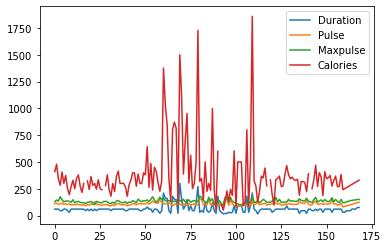

In [47]:
df.plot()

plt.show()

In [43]:
#getting corelation 
df.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.155408,0.009403,0.922717
Pulse,-0.155408,1.000000,0.786535,0.025121
Maxpulse,0.009403,0.786535,1.000000,0.203813
Calories,0.922717,0.025121,0.203813,1.000000


# What is Matplotlib?
Matplotlib is a low level graph plotting library in python that serves as a visualization utility.

Matplotlib was created by John D. Hunter.

Matplotlib is open source and we can use it freely.

Matplotlib is mostly written in python, a few segments are written in C, Objective-C and Javascript for Platform compatibility.



In [86]:
#view columns & rename columns 
df.columns
df3 = df.rename(index=str,columns={"Duration":"du"}) #check how we rename multiple columns in a dataset 


In [87]:
df3.columns

Index(['du', 'Pulse', 'Maxpulse', 'Calories'], dtype='object')

In [85]:
df3

,Duration,Pulse,max,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [56]:
# view all rows for one column
df['Calories']

0      409.1
1      479.0
2      340.0
3      282.4
4      406.0
       ...  
164    290.8
165    300.0
166    310.2
167    320.4
168    330.4
Name: Calories, Length: 169, dtype: float64

In [90]:
#view all columns for select group of rows
data[0:15]

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,paint_color,image_url,description,state,lat,long,posting_date,age,price2x,price3x
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600,9.0,71980,107970
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600,5.0,15000,22500
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600,13.0,9800,14700
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600,45.0,4000,6000
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600,14.0,39000,58500
5,5,7239776805,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,29590,2016.0,toyota,tacoma double cab sr5,good,...,red,https://images.craigslist.org/00k0k_9nUNSlCBLM...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-01T07:27:25-0600,3.0,59180,88770
6,6,7239425036,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39990,2012.0,ford,mustang shelby gt500 coupe,good,...,blue,https://images.craigslist.org/01515_fL9MWURsaZ...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-11-30T13:34:00-0600,7.0,79980,119970
7,7,7238667661,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,41990,2012.0,chevrolet,camaro zl1 coupe 2d,good,...,red,https://images.craigslist.org/00p0p_eXZbgunMDy...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-11-29T07:39:33-0600,7.0,83980,125970
8,8,7238127696,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,31990,2017.0,jeep,wrangler unlimited sport s,good,...,NaN,https://images.craigslist.org/00g0g_lCDDDlgwtZ...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-11-28T07:21:09-0600,2.0,63980,95970
9,9,7237779886,https://auburn.craigslist.org/ctd/d/santa-cruz...,auburn,https://auburn.craigslist.org,490,2019.0,ford,transit connect wagon xlt,excellent,...,NaN,https://images.craigslist.org/00D0D_foGOQzDTOx...,2019 Ford Transit Connect Wagon XLT FOR ONLY $...,al,36.967357,-122.024254,2020-11-27T12:42:28-0600,0.0,980,1470


In [61]:
#filter for multiple columns (all below do the same thing ) 
data[['url','lat','price']]
data.loc[:,['url','lat','price']]
data.iloc[:,0:3]

,Unnamed: 0,id,url
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...
...,...,...,...
458208,458208,7240959076,https://wausau.craigslist.org/ctd/d/wisconsin-...
458209,458209,7240954682,https://wausau.craigslist.org/ctd/d/wisconsin-...
458210,458210,7240645700,https://wyoming.craigslist.org/cto/d/sheridan-...
458211,458211,7240600465,https://wyoming.craigslist.org/cto/d/sheridan-...


In [ ]:
#filtering 


In [63]:
#filter by rows and columns 
data.loc[0:100,['url','lat','price']]
data.iloc[0:100,0:3]


,Unnamed: 0,id,url
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...
...,...,...,...
95,95,7240566722,https://bham.craigslist.org/ctd/d/summerville-...
96,96,7240548971,https://bham.craigslist.org/ctd/d/cartersville...
97,97,7240543174,https://bham.craigslist.org/ctd/d/cartersville...
98,98,7240485219,https://bham.craigslist.org/ctd/d/stokesdale-2...


In [64]:
#filter by column list 
data[data.columns]

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,458208,7240959076,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,14995,2014.0,cadillac,srx,excellent,...,4wd,mid-size,SUV,silver,https://images.craigslist.org/00808_1bVcaYZtCy...,2014 Cadillac SRX All Wheel Drive Luxury Colle...,wi,44.408867,-89.881210,2020-12-03T08:56:29-0600
458209,458209,7240954682,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,17895,2018.0,hyundai,tucson,excellent,...,4wd,mid-size,SUV,white,https://images.craigslist.org/00l0l_gikkP11dEF...,2018 Hyundai Tucson SE 2.0 I4 AWD. Carfax ver...,wi,44.408867,-89.882240,2020-12-03T08:48:08-0600
458210,458210,7240645700,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,17900,2014.0,cadillac,cts coupe awd,excellent,...,4wd,mid-size,coupe,black,https://images.craigslist.org/00t0t_lNnW4cboOG...,"53,000 miles. Cosmetically, in near mint condi...",wy,44.784900,-106.964800,2020-12-02T14:09:45-0700
458211,458211,7240600465,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,1300,2008.0,jeep,grand cherokee,good,...,4wd,mid-size,SUV,white,https://images.craigslist.org/00C0C_fl0NW1IeJw...,PRICE REDUCTION Turns out the engine is toast...,wy,44.773500,-106.939600,2020-12-02T13:01:04-0700


In [66]:
#filtering data by columns & boolean indexing 
data[(data['age'] < 5)]

data.loc[(data.age <5),:]


,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,age
5,5,7239776805,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,29590,2016.0,toyota,tacoma double cab sr5,good,...,NaN,pickup,red,https://images.craigslist.org/00k0k_9nUNSlCBLM...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-01T07:27:25-0600,3.0
8,8,7238127696,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,31990,2017.0,jeep,wrangler unlimited sport s,good,...,NaN,other,NaN,https://images.craigslist.org/00g0g_lCDDDlgwtZ...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-11-28T07:21:09-0600,2.0
9,9,7237779886,https://auburn.craigslist.org/ctd/d/santa-cruz...,auburn,https://auburn.craigslist.org,490,2019.0,ford,transit connect wagon xlt,excellent,...,NaN,van,NaN,https://images.craigslist.org/00D0D_foGOQzDTOx...,2019 Ford Transit Connect Wagon XLT FOR ONLY $...,al,36.967357,-122.024254,2020-11-27T12:42:28-0600,0.0
12,12,7237366792,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,24990,2016.0,ram,1500 crew cab slt pickup 4d,good,...,NaN,pickup,NaN,https://images.craigslist.org/00O0O_7r7iltwH7G...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-11-26T12:50:29-0600,3.0
18,18,7236210088,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,32990,2019.0,ford,f150 supercrew cab xlt,good,...,NaN,pickup,silver,https://images.craigslist.org/00r0r_iV4TYppIUV...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-11-24T07:23:47-0600,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458201,458201,7241009387,https://wausau.craigslist.org/ctd/d/wausau-201...,wausau,https://wausau.craigslist.org,14590,2015.0,bmw,i3 hatchback 4d,good,...,NaN,hatchback,NaN,https://images.craigslist.org/00H0H_e25REbgf6W...,Carvana is the safer way to buy a car During t...,wi,44.960000,-89.640000,2020-12-03T10:18:21-0600,4.0
458203,458203,7240977929,https://wausau.craigslist.org/ctd/d/wausau-201...,wausau,https://wausau.craigslist.org,14590,2016.0,bmw,i3 hatchback 4d,good,...,NaN,hatchback,NaN,https://images.craigslist.org/00l0l_cQCZp0X2QB...,Carvana is the safer way to buy a car During t...,wi,44.960000,-89.640000,2020-12-03T09:29:49-0600,3.0
458205,458205,7240969563,https://wausau.craigslist.org/ctd/d/eau-claire...,wausau,https://wausau.craigslist.org,20950,2015.0,jeep,grand cherokee overland 4x4,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00606_inlZnX05CG...,2015 Jeep Grand Cherokee Overland 4x4 ✔ We TA...,wi,44.843195,-91.550371,2020-12-03T09:15:05-0600,4.0
458207,458207,7240964712,https://wausau.craigslist.org/ctd/d/eau-claire...,wausau,https://wausau.craigslist.org,19950,2017.0,audi,a4 premium plus quattro awd,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00o0o_elNZEbATqG...,2017 Audi A4 Premium Plus Quattro AWD ✔ We TA...,wi,44.843195,-91.550371,2020-12-03T09:06:21-0600,2.0


In [65]:
#add column 
data['age'] = 2019 - data['year']


In [ ]:
# basic operators on columns 
data['price_per_mile'] = data['price'] / data['odometer']


In [100]:
df['dupul'] = df['Duration']/df['Pulse']

In [101]:
df

,Duration,Pulse,Maxpulse,Calories,calpul,dupul
0,60,110,130,409.1,3.719091,0.545455
1,60,117,145,479.0,4.094017,0.512821
2,60,103,135,340.0,3.300971,0.582524
3,45,109,175,282.4,2.590826,0.412844
4,45,117,148,406.0,3.470085,0.384615
...,...,...,...,...,...,...
164,60,105,140,290.8,2.769524,0.571429
165,60,110,145,300.0,2.727273,0.545455
166,60,115,145,310.2,2.697391,0.521739
167,75,120,150,320.4,2.670000,0.625000


In [67]:
# apply function 

def timex2(x):
    return 2*x

data['price2x'] = data['price'].apply(timex2)
data['price'].head()
data['price2x'].head()

0    71980
1    15000
2     9800
3     4000
4    39000
Name: price2x, dtype: int64

In [108]:
def timex2(x):
    return 2*x

df2['Duration2x'] = df['Duration'].apply(timex2)
df2['Duration'].head()
df2['Duration2x'].head()

<ipython-input-108-5ed3dffbeb24>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Duration2x'] = df['Duration'].apply(timex2)


0    120.0
1    120.0
2    120.0
3     90.0
4     90.0
Name: Duration2x, dtype: float64

In [68]:
#lambda function 
data['price3x'] = data['price'].apply(lambda x: x*3)
data['price3x'].head()

0    107970
1     22500
2     14700
3      6000
4     58500
Name: price3x, dtype: int64

In [69]:
#dummy variables 
data_dummies = pd.get_dummies(data[['price','year','fuel','transmission','type']])


<AxesSubplot:xlabel='year'>

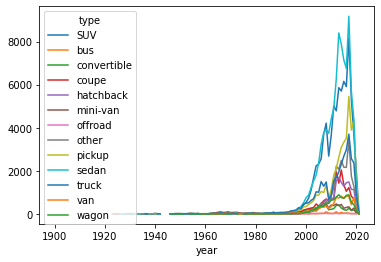

In [70]:
#pivot table / sort_index / sort_values 
data.pivot_table(index='year',columns='type',values='price',aggfunc ='mean').sort_index(ascending=False)
data.pivot_table(index='year',columns='type',values='price',aggfunc ='count').sort_index(ascending=False)
data.pivot_table(index='year',columns='type',values='price',aggfunc ='count').sort_index(ascending=False).plot()


In [71]:
#groupby 
data.groupby('type').mean()
data.groupby(['type','fuel']).mean()
data.groupby(['type','fuel'],as_index = False).mean()

,type,fuel,Unnamed: 0,id,price,year,odometer,lat,long,age,price2x,price3x
0,SUV,diesel,226911.695373,7.235279e+09,19343.570694,2009.791506,110524.967699,39.529982,-100.737849,9.208494,38687.141388,58030.712082
1,SUV,electric,179992.729167,7.236947e+09,50290.791667,2016.562500,40988.844444,35.952523,-105.176048,2.437500,100581.583333,150872.375000
2,SUV,gas,231729.442345,7.235166e+09,13825.767596,2011.946895,101347.305668,39.308835,-96.240308,7.053105,27651.535191,41477.302787
3,SUV,hybrid,248902.971660,7.235729e+09,15323.455466,2012.060976,106299.243802,40.153276,-101.216078,6.939024,30646.910931,45970.366397
4,SUV,other,222833.205933,7.235288e+09,16299.396463,2013.011409,106406.657310,38.445257,-95.952305,5.988591,32598.792926,48898.189390
...,...,...,...,...,...,...,...,...,...,...,...,...
56,wagon,diesel,210396.864111,7.233975e+09,11596.076655,2011.857143,78858.714286,40.254986,-98.186943,7.142857,23192.153310,34788.229965
57,wagon,electric,203509.113043,7.235415e+09,21395.313043,2018.826087,14357.373913,39.434653,-97.901405,0.173913,42790.626087,64185.939130
58,wagon,gas,233940.897237,7.235440e+09,11391.198489,2011.137860,101120.572999,39.738757,-95.682538,7.862140,22782.396978,34173.595467
59,wagon,hybrid,224780.085106,7.235462e+09,9636.457447,2014.632979,84546.445652,37.462859,-99.404609,4.367021,19272.914894,28909.372340


In [76]:
# pd.merge == to join in sql  
df1 = data[['url','lat']]
df2 = data[['url','price']]
df_merged = pd.merge(df1,df2,on='url')
df_merged

,url,lat,price
0,https://auburn.craigslist.org/ctd/d/auburn-uni...,32.590000,35990
1,https://auburn.craigslist.org/cto/d/auburn-201...,32.547500,7500
2,https://auburn.craigslist.org/cto/d/auburn-200...,32.616807,4900
3,https://auburn.craigslist.org/cto/d/lanett-tru...,32.861600,2000
4,https://auburn.craigslist.org/cto/d/auburn-200...,32.547500,19500
...,...,...,...
458208,https://wausau.craigslist.org/ctd/d/wisconsin-...,44.408867,14995
458209,https://wausau.craigslist.org/ctd/d/wisconsin-...,44.408867,17895
458210,https://wyoming.craigslist.org/cto/d/sheridan-...,44.784900,17900
458211,https://wyoming.craigslist.org/cto/d/sheridan-...,44.773500,1300


In [9]:
# write to a csv file pd.to_csv() or exporting it to csv 
df2.to_csv('C:/data/steve.csv')